In [85]:
from __future__ import division
import matplotlib.pyplot as plt
import scipy.fft as sp 
from scipy.fft import fft, fftfreq, fftshift
from math import pi as PI
import math
import cmath
import numpy as np
from scipy import signal
import random as rand
from scipy.fftpack import fft, ifft


# Для Вейвлет преобразования
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


class FuncParams:
    def __init__(self, from_, to, ampl, omega, shift, N):
        self.From = from_
        self.To = to
        self.Ampl = ampl
        self.Omega = omega
        self.shift = shift
        self.N = N

class Function :
    x = []
    y = []
    
    def __init__(self, FuncParams):
      
       self.From = FuncParams.From
       self.To = FuncParams.To
       self.W = FuncParams.Omega
       self.N = FuncParams.N
       self.Shift = FuncParams.shift
       self.Ampl = FuncParams.Ampl

    def reset_x(self):
       # self.x.clear()
         self.x = np.linspace(self.From, self.To, self.N)

    def calc(self, func, *args, **func_args):
        self.reset_x()
        #for key, val in func_args.items():
         #   print(key, val)
        
        self.y = self.Ampl*func(self.W*(self.x+self.Shift), *args, **func_args)
    def plot(self, title=""):
        fig = plt.figure()
        fig.suptitle(title)
        subplot = fig.add_subplot(111)
        subplot.plot(self.x, self.y, 'b', marker='.')
               
        fig.show()

    def normalize(self, value):
        len_ = len(self.y)
        for i in range (0, len_):
            self.y[i] = self.y[i]/value

    def noize(self, intensity, level):
        if intensity >=0:
            increment = 1/intensity
            len_ = len(self.y)
            x = 0
            for i in range(0, len_):
                x+=increment
                if(x>=1):
                    x=0
                    self.y[i] += rand.uniform(-level, +level)

    def FFT(self):
        fft_lib_res = np.fft.fft(self.y)
        spacing_period = (self.From-self.To)/self.N

        xf = fftfreq(self.N, spacing_period)
        return [fftshift(xf), fftshift(fft_lib_res)]

    def IFFT(self):
        ifft_y = np.fft.ifft(self.y)
        #spacing_period = (self.From-self.To)/self.N

        ifft_x = np.linspace(self.From, self.To, len(ifft_y))
        return [ifft_x, ifft_y]
        
    

  
def get_step_Func(f_From, f_To, f_cut_From, f_cut_To, N_pts):
    #N_pts = get_points_numb(f_From, f_To, df)
    Step_Func = Function((FuncParams(f_From, f_To, 1, 1, 0, N_pts)))
    Step_Func.calc(step, f_cut_From, f_cut_To)
    return Step_Func
    

def normalize(y, val):
    for i in range(0, len(y)):
        y[i] = y[i]/val
    return y 

def get_module(y):
    res = []
    for i in range(len(y)):
        res.append(abs(y[i]))
    return res


def plot_y(y, title, From = 0, To = 0):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    if(From != 0 or To != 0):
        x = np.linspace(From, To, len(y))
        sp.plot(x,y)
    else:
        sp.plot(y)
    fig.show()


def IFFT(x, y, from_, to_):
    ifft_y = np.fft.ifft(y)
    #spacing_period = (self.From-self.To)/self.N
    ifft_x = np.linspace(from_, to_, len(ifft_y))
    return [ifft_x, ifft_y]


def FFT(x, y, from_, to_, N):
    '''fft_lib_res = np.fft.fft(y)
    spacing_period = (from_ - to_ / N)

    xf = fftfreq(N, spacing_period)
    return [fftshift(xf), fftshift(fft_lib_res)]'''
    fft_lib_res = np.fft.fft(y)
    
    spacing_period = (to_ - from_)#(to_ - from_ / N)
    x_fft = []
    for i in range(0, len(fft_lib_res)):
        x_fft.append(i / spacing_period)
       
    return [x_fft, fft_lib_res]


def get_points_numb(t_from, t_to, dt):
    return int((t_to - t_from) / dt)


def get_sample_rate(pts_numb, t_from, t_to):
    return int(pts_numb / (t_to - t_from))


def step(x, *args, **kwargs):
    step_from_, step_to_ = args # откуда до куда будут ненулевые значения
                                               # + область определения функции
    
    samples_num = len(x)
    numb_of_pts_within = 0
    
    for x_ in x:
        if step_from_<=x_<=step_to_:
            numb_of_pts_within+=1 # колво точек попадающих в область ступеньки
    
    step_height = 1#1/numb_of_pts_within
    y = []
    for i in range(0, len(x)):
        if step_from_<=x[i]<=step_to_:
            y.append(step_height)
        else:
            y.append(0)
        
    return y

# Получение неидеального фильтра - От синкуса надо оставить часть точек, а остальное добить нулями
# Пробуем оставить часть точек синкуса, а остальные добить нулями
def cut_filter(Pts_to_keep, y_filt):
    Pts_to_keep_left = []
    Pts_to_keep_right = []
    if(Pts_to_keep%2 == 0):
        Pts_to_keep_aside = int(Pts_to_keep / 2)
        print(Pts_to_keep_aside)
        how_many_zeros = len(y_filt) - Pts_to_keep
        Pts_to_keep_left = y_filt[0 : Pts_to_keep_aside]
        Pts_to_keep_right = y_filt[ len(y_filt) - Pts_to_keep_aside : len(y_filt)]
        res = np.concatenate([Pts_to_keep_left, np.zeros(how_many_zeros)])
        res = np.concatenate([res, Pts_to_keep_right])
        return res

def adjust_filter(y):
    #print('len x = ', len(x))
    #x = change_halves(x, len(x)%2 == 0)
    y = change_halves(y, len(y)%2 == 0)
    return y

def mirror_func(x, y):
    x_ = list(x)
    x_ = np.flip(x)
    x_ = [-i for i in x_]
    x_ = np.concatenate([x_, x])
    
    y_ = list(y)
    y_ = np.flip(y_)
    y_  = np.concatenate([y_, y])
    return [x_, y_]

def change_halves(x, is_even):
    x_ = []
    if(is_even):
        x_ = x[len(x)//2 : ]
        print('x even len half x = ', len(x_))
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    else:
        print('x not even')
        x_ = x[len(x)//2 : ]
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    return x_

def plot(x, y, title):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    sp.plot(x, y)
    fig.show()
    
    
def get_FFT_cut(Func):
    [x_fft, y_fft] = FFT(Func.x, Func.y, Func.From, Func.To, Func.N)
    x_fft_cut = x_fft[0 : len(x_fft)//2]
    y_fft_cut = y_fft[0: len(y_fft)//2]
    return [x_fft_cut, y_fft_cut]


def get_fourier_of_filtered_signal(src_spectrum, step):
    y_res = []
    if(len(src_spectrum) == len(step)):
        for i in range(len(src_spectrum)):
            y_res.append(src_spectrum[i] * step[i])
    return y_res
    
    
def plot_func_and_FFT(x, y, title, freq_limits):
    To = x[len(x)-1]
    From = x[0]
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(121)
    sp.plot(x, y, label = 'src func')
    sp.legend()
    
    [x_fft, y_fft] = FFT(x, y, From, To, len(x))
    sp = fig.add_subplot(122)
    sp.set_xlim(freq_limits)
    sp.plot(x_fft, abs(y_fft), label = 'Fourier')
    sp.legend()
    
    fig.show()
    
    

def MexicanHat2ndOrder(t):
    return (1-t**2)*exp(-0.5*(t**2))

def Gauss1stOrder(t):
    return -t * exp(-t**2 / 2)
                  

def w(a,b, N, wavelet_func, Function):    
    f = lambda t : (1 / a**0.5) * wavelet_func((t - b) / a)*Function(t)#S(t)
    r= quad(f, -N, N)
    return round(r[0],3)

def calc_wavelet(a_arr, b_arr, N, wavelet_func, Function):
    z = array([w(a,b, N, wavelet_func, Function) for b in b_arr for a in a_arr])
    return z


def plot_src_func(SourceFunc, t_from, t_to, dt, title_):
    N = get_points_numb(t_from, t_to, dt)
    Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
    Func.reset_x()
    Func.y = SourceFunc(Func.x)
    Func.plot(title = title_)
    
def plot_wavelet_res(A, B, Z):
    fig = plt.figure("Wavelet Spectrum")
    ax = Axes3D(fig)
    ax.plot_surface(A, B, Z, rstride=1, cstride=1, cmap=cm.jet)
    ax.set_xlabel(' Parameter a (Scale)')
    ax.set_ylabel('Parameter b (Shift)')
    ax.set_zlabel('Wavelet Transform Amplitude: $ N_{ab}$')
    plt.figure("2D-graph, z = w (a,b)")
    plt.title('2D-graph, z = w (a,b)', size=12)
    plt.contourf(A, B, Z, 100)
    plt.show()

def do_wavelet(a_lim, b_lim, integral_lim, wavelet_func, Function):
    
    a_arr = arange(a_lim[0], a_lim[1], 1)
    b_arr = arange(b_lim[0], b_lim[1], 1)

    z = calc_wavelet(a_arr, b_arr, integral_lim, wavelet_func, Function)#MexicanHat2ndOrder)


    A, B = meshgrid(a_arr, b_arr)
    
    a_max = a_lim[1]
    a_min = a_lim[0]
    b_max = b_lim[1]
    b_min = b_lim[0]
    Z = z.reshape(a_max-a_min, b_max-a_min)
    plot_wavelet_res(A, B, Z)
    

    
def plot_wavelet(x_from, x_to, dx, wavelet_func, a, b, wavelet_func_name, freq_limits):
    x= arange(x_from, x_to, dx)
    y=[(1 / a**(0.5)) * wavelet_func((t-b) / a) for t in x]
    
    plot_func_and_FFT(x, y, 'Wavelet Func is' + str(wavelet_func_name) + ', a = ' + str(a) + ' b = ' + str(b), freq_limits)



<ipython-input-85-77ad15091fee>:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


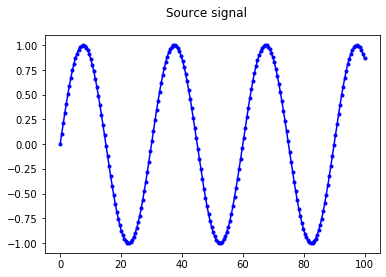

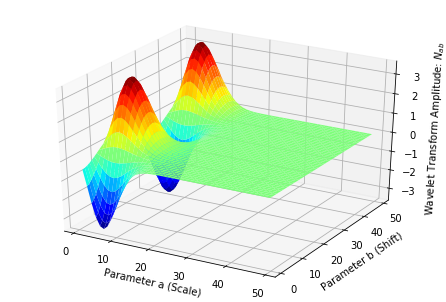

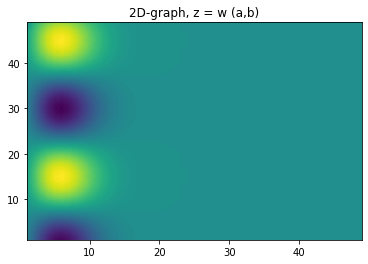

In [86]:

def S(t):
    T = 30
    return sin(2*pi*t/T)

plot_src_func(S, 0, 100, 0.5, 'Source signal')
do_wavelet([1,50], [1,50], 256, Gauss1stOrder, S)




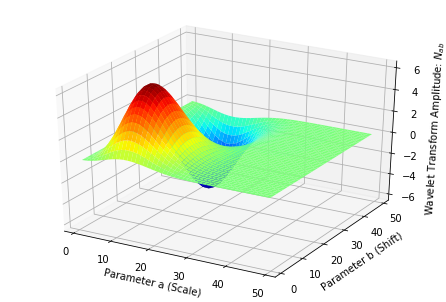

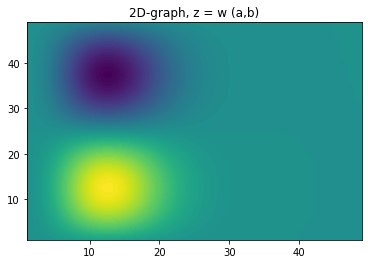

In [87]:

def F(t):
    T = 50
    return sin(2*pi*t/T)

do_wavelet([1,50], [1,50], 256, MexicanHat2ndOrder, F)

<ipython-input-74-1bf4011b1cad>:260: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-74-1bf4011b1cad>:260: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-74-1bf4011b1cad>:260: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


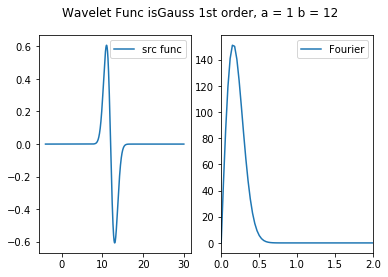

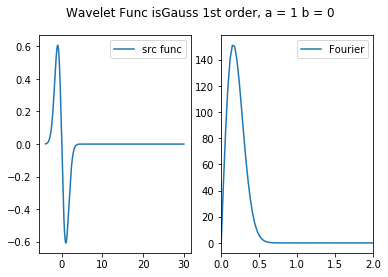

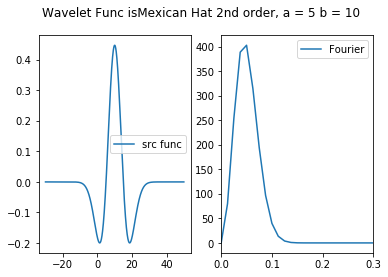

In [82]:
plot_wavelet(-4, 30, 0.01, Gauss1stOrder, 1, 12, 'Gauss 1st order', [0,2])
plot_wavelet(-4, 30, 0.01, Gauss1stOrder, 1, 0, 'Gauss 1st order', [0,2])
plot_wavelet(-30, 50, 0.01, MexicanHat2ndOrder, 5, 10, 'Mexican Hat 2nd order', [0,0.3])